## Compare masks

In [1]:
import os

import numpy as np
import matplotlib as mpl
#mpl.use('TkAgg')
import matplotlib.pyplot as plt
from scipy import ndimage
import matplotlib.image as mpimg



In [2]:
# Вывод данных в виде изображения
# data - массив данных
# title - подпись к изоюражению
# size - размер подложки
def show_img(data, title = "", size = 15, cmap_user = plt.cm.cool):
    plt.figure(figsize=(size, size))
    plt.imshow(data, cmap_user)#, cmap = plt.cm.cividis) #cividis #tab20c
    plt.xlabel(title)    
    plt.show()
    plt.close()
     

In [3]:
FILL_RADIUS = 7.5 #для отбора кандидатов
#cmap_ir11 = ListedColormap(pal.ir11_palette[::-1] / 255)

In [4]:
def cmp_area(mask_b, mask_nn):
    
    #пересечение двух масок
    intersect = mask_b * mask_nn
    #пропущенные пиксели
    miss = mask_b.copy()
    miss[intersect] = 0
    #лишние пиксели
    add = mask_nn.copy()
    add[intersect] = 0
   
    src_area = np.sum(mask_b)
    inter_area = np.sum(intersect)
    miss_area = np.sum(miss)
    add_area = np.sum(add)
    good = inter_area  / src_area * 100
    excess = add_area / src_area * 100
    false = excess / (good + excess) *100    
    
    #show_img(mask_full)
    #show_img(mask_full1)
    #show_img(intersect)
    #show_img(miss)
    #show_img(add) 
    
    #print(np.sum(intersect))
    #print(np.sum(miss))    
    #print(np.sum(mask_b))
    #print(np.sum(mask_nn))
    
    return good, excess, false

In [5]:
def plot_cmp(sum_good, sum_excess):
    x = np.arange(1, len(sum_good) + 1)  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots(figsize=(10, 6))
    rects1 = ax.bar(x, sum_good, width, label='Совпадающие пиксели')
    rects2 = ax.bar(x, sum_excess, width, label='Ложные пиксели')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax.set_ylabel('Отношение к площади эталонной маски, %')
    ax.set_xlabel('Номер случая')
    ax.set_title('Соотношение созданной и эталонной масок')
    ax.set_xticks(x)

    ax.legend()

    plt.plot()

In [6]:
#pal.ir11_palette.shape

In [7]:
!pwd

/home/data/NN/Mask_RCNN/samples/cyclone


In [8]:
ROOT_DIR = os.getcwd()
#ROOT_DIR = os.path.dirname(os.path.dirname(ROOT_DIR))
print(ROOT_DIR)

/home/data/NN/Mask_RCNN/samples/cyclone


In [9]:
mask_folder = '../../results/cyclone/'

folder = os.listdir(mask_folder)

#epoch_folders = [ii for ii in folder if ii.startswith('submit')]
epoch_folders = [ii for ii in folder if ii.startswith('08_submit')]
epoch_folders.sort()

bench_folder = '../../datasets/cyclone/test/'

08_submit_20201022T120421_40/ ; 9 ; 88.02 ; 20.11 ; 4.38 ; 0.81 ; 0.88 ; 0.85
08_submit_20201022T120815_39/ ; 9 ; 87.35 ; 13.53 ; 6.46 ; 0.87 ; 0.87 ; 0.87
08_submit_20201022T121102_36/ ; 9 ; 79.29 ; 14.61 ; 5.43 ; 0.84 ; 0.79 ; 0.82
08_submit_20201022T121257_34/ ; 9 ; 87.85 ; 21.22 ; 4.14 ; 0.81 ; 0.88 ; 0.84
08_submit_20201022T121508_25/ ; 9 ; 73.02 ; 19.81 ; 3.69 ; 0.79 ; 0.73 ; 0.76


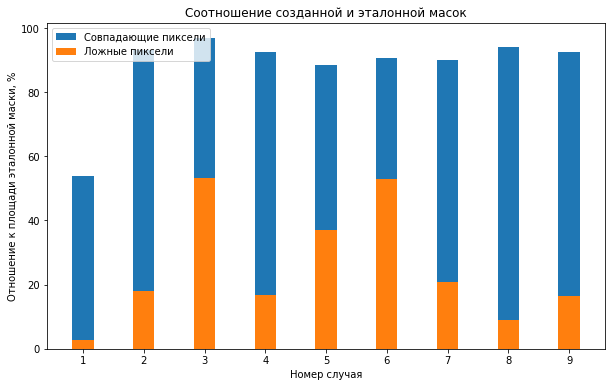

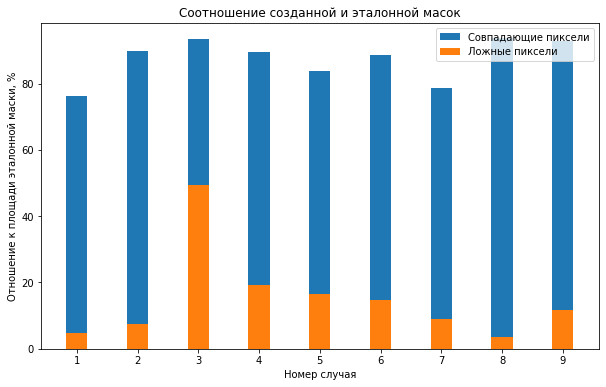

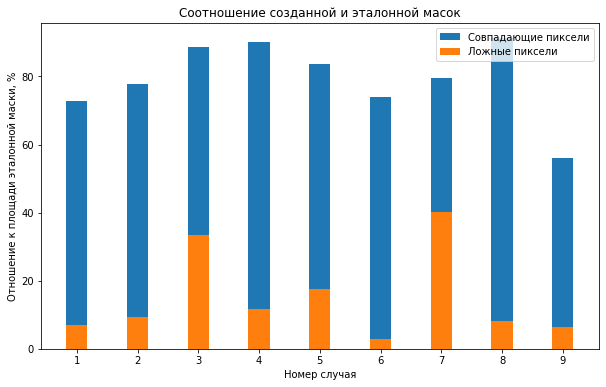

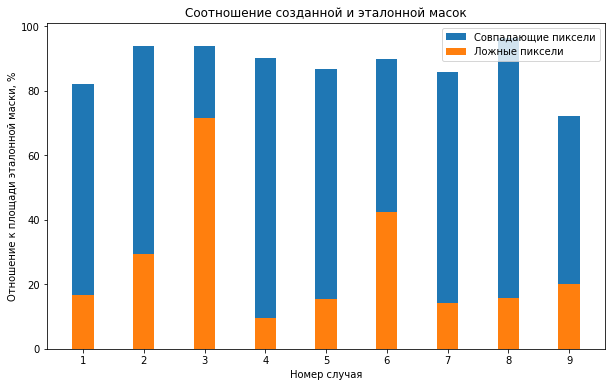

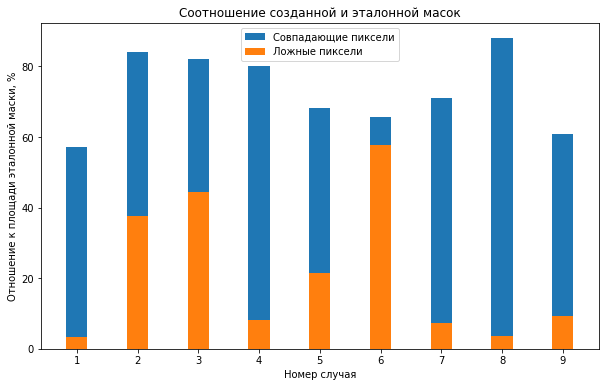

In [10]:


apod = []
afar = []
aprec = []
arecall = []
af1 = []

#epoch_folders = ['submit_20200430T_38_08']

for epoch_folder in epoch_folders:
    
    
    
    #print(files)
    epoch_folder += '/'
    
    #sum_mask = 0
    #sum_ok = 0
    #sum_part = 0
    #sum_no = 0
    #sum_false = 0
    sum_good = [] #pod для каждого
    sum_excess = [] #процент ложных от площади исходной маски для каждого
    sum_false = [] #far для каждого
    
    folder = os.listdir(mask_folder + epoch_folder)
    files = [ii for ii in folder if ii.endswith('_mask.png')]
    files.sort()
    
    #files = ["s20192181800536_1000_1000_3_masked_ir.png_mask.png"]
    
    for filename in files:
        #bench_name = "mask_test.png"
        #file1_name = "mask_test1.png"

        
        bench_name = filename.replace(".png_mask.png", "_mask.png");
        #эталонная
        #bench_name = "s20192151600520_1000_2000_0_mask_n.png"
        # рассчитанная
        file1_name = epoch_folder + filename

        mask_full = mpimg.imread(bench_folder + bench_name).astype(np.bool)        
          
        label_im_b, nb_labels_b = ndimage.label(mask_full)
        labels_b = np.unique(label_im_b)
        #print("labels_nb=", nb_labels_b, labels_b)
        #label_im = np.searchsorted(labels, label_im)     

        mask_full1 = mpimg.imread(mask_folder + file1_name).astype(np.bool)        
          
        label_im_1, nb_labels_1 = ndimage.label(mask_full1)
        labels_1 = np.unique(label_im_1)
        #print("labels_nb=", nb_labels_1, labels_1)
  
      
        good, excess, false = cmp_area(mask_full, mask_full1)
        #print(filename, good, excess, false)
        sum_good.append(good)
        sum_excess.append(excess)
        sum_false.append(false)
    
        #print(cnt_ok, ";", cnt_part, ";", cnt_no, ";", cnt_false)
    #pod = (sum_ok + sum_part) * 100. / sum_mask
    pod = sum(sum_good) / len(sum_good)
    #far = sum_false *100. / (sum_ok + sum_part + sum_false)
    far = sum(sum_false) / len(sum_false)
    
    prec = pod / (pod + far) 
    recall = pod / 100
    f1 = 2*prec*recall / (prec + recall)
    print(epoch_folder, ";", len(files), ";" ,
          "{:.2f} ; {:.2f} ; {:.2f} ; {:.2f} ; {:.2f} ; {:.2f}".format(pod, far, pod/far, prec, recall, f1))  
    
    #print("good", sum_good, "\nexcess = ", sum_excess)
    
    apod.append(pod / 100.)
    afar.append(far / 100.)
    aprec.append(prec)
    arecall.append(recall)
    af1.append(f1)
    plot_cmp(sum_good, sum_excess)

    #mask_no = np.ma.masked_array(label_im_b, label_im_1 != 0) 
    #mask_false = np.ma.masked_array(label_im_1, label_im_b != 0) 
    #show_img(label_im_b, size =10)
    
    #show_img(label_im_1, size =10)

    #show_img(mask_no, size =15)
    #show_img(mask_false, size =15)

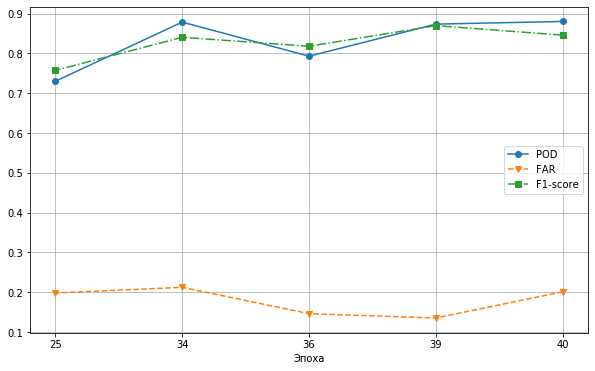

In [11]:
plt.figure(figsize=(10, 6))
#x = [40, 39, 36, 34, 25]
x = [5, 4, 3, 2, 1]
plt.xlabel("Эпоха")    
plt.plot(x, apod,   label ="POD", marker = 'o')
plt.plot(x, afar,  label ="FAR", marker = 'v', linestyle = '--')
plt.plot(x, af1, label ="F1-score", marker = 's', linestyle = '-.')
my_xticks = ['40','39','36','34', '25'] 
plt.xticks(x, my_xticks) 
plt.legend()
plt.grid()
plt.show()